In [37]:
import pandas as pd
from sklearn.impute import SimpleImputer
from scipy.stats import zscore
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

# Set a theme
sns.set(style="whitegrid")


In [42]:
data= pd.read_csv(r"C:\Users\Administrator\AppData\Local\Temp\55ece67f-aa3a-4e72-9b0c-c146a36232da_archive (3).zip.2da\student_habits_performance.csv")

In [3]:
data.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [9]:
data[['student_id','exam_score']].min()

student_id    S1000
exam_score     18.4
dtype: object

In [47]:
data.isna().sum()

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
pass                             0
dtype: int64

In [45]:
#Handle Missing Values
data['parental_education_level'].fillna('Unknown', inplace=True)

In [46]:
#Create Target Variable (Pass/Fail)
data['pass'] = data['exam_score'].apply(lambda x: 1 if x >= 50 else 0)

In [19]:
data.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,pass
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,1
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0,1
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3,0
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8,0
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4,1


In [20]:
#Encode Categorical Variables

data = pd.get_dummies(data, columns=['gender', 'diet_quality', 'part_time_job', 
                                 'parental_education_level', 'internet_quality', 
                                 'extracurricular_participation'], drop_first=True)

In [29]:
numeric_columns = [
    'age',
    'study_hours_per_day',
    'social_media_hours',
    'netflix_hours',
    'attendance_percentage',
    'sleep_hours',
    'exercise_frequency',
    'mental_health_rating'
]


In [30]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])


In [32]:
# Split first
from sklearn.model_selection import train_test_split

X = data.drop(['student_id', 'exam_score', 'pass'], axis=1)
y = data['pass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Scale only numerical columns
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [35]:
y_pred = model.predict(X_test)


In [36]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.94


C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


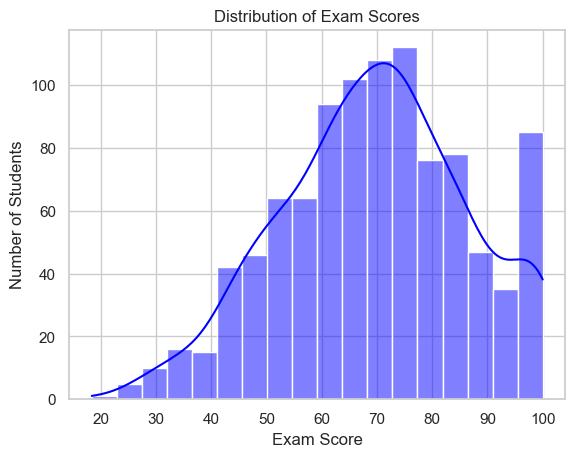

In [39]:
sns.histplot(data['exam_score'], kde=True, color='blue')
plt.title("Distribution of Exam Scores")
plt.xlabel("Exam Score")
plt.ylabel("Number of Students")
plt.show()

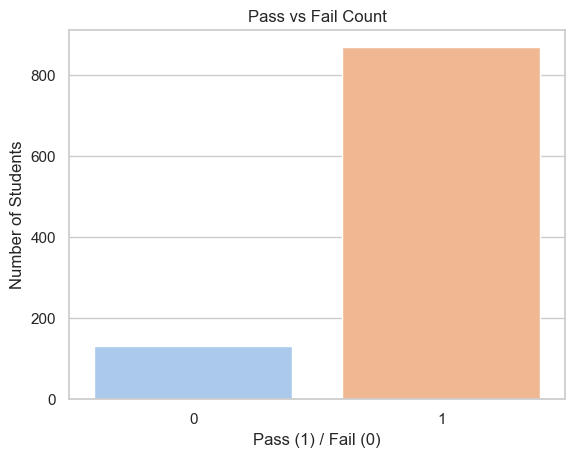

In [40]:
sns.countplot(x='pass', data=data, palette='pastel')
plt.title("Pass vs Fail Count")
plt.xlabel("Pass (1) / Fail (0)")
plt.ylabel("Number of Students")
plt.show()

In [53]:
data['pass'] = data['pass'].astype(str)  # or .astype('category')


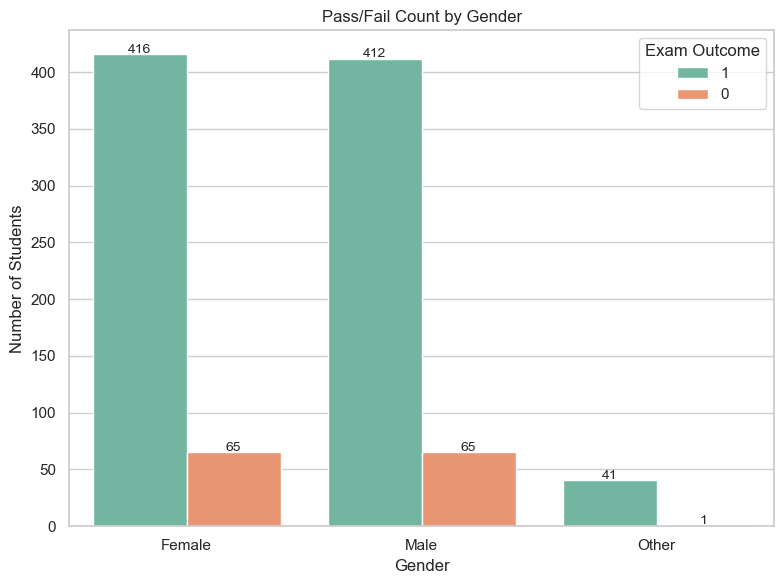

In [56]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='gender', hue='pass', data=data, palette='Set2')

# Add count labels
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 1, int(height), 
            ha='center', fontsize=10)

plt.title("Pass/Fail Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Students")
plt.legend(title="Exam Outcome")
plt.tight_layout()
plt.show()

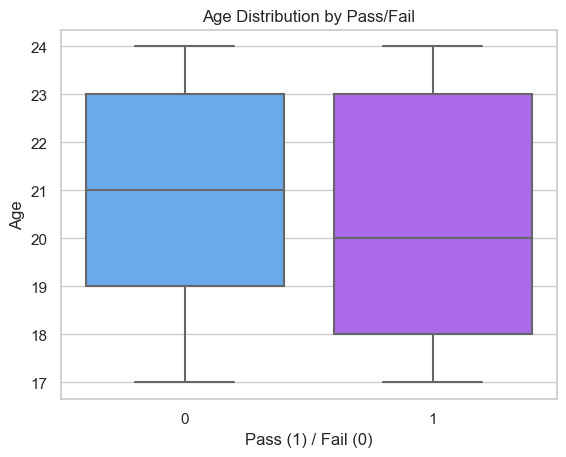

In [49]:
sns.boxplot(x='pass', y='age', data=data, palette='cool')
plt.title("Age Distribution by Pass/Fail")
plt.xlabel("Pass (1) / Fail (0)")
plt.ylabel("Age")
plt.show()


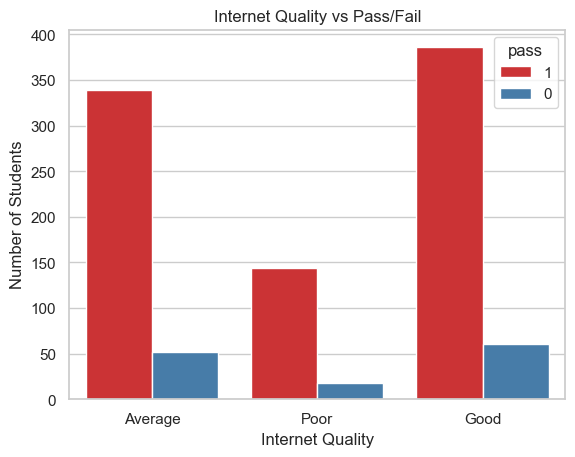

In [55]:
sns.countplot(x='internet_quality', hue='pass', data=data, palette='Set1')
plt.title("Internet Quality vs Pass/Fail")
plt.xlabel("Internet Quality")
plt.ylabel("Number of Students")
plt.show()


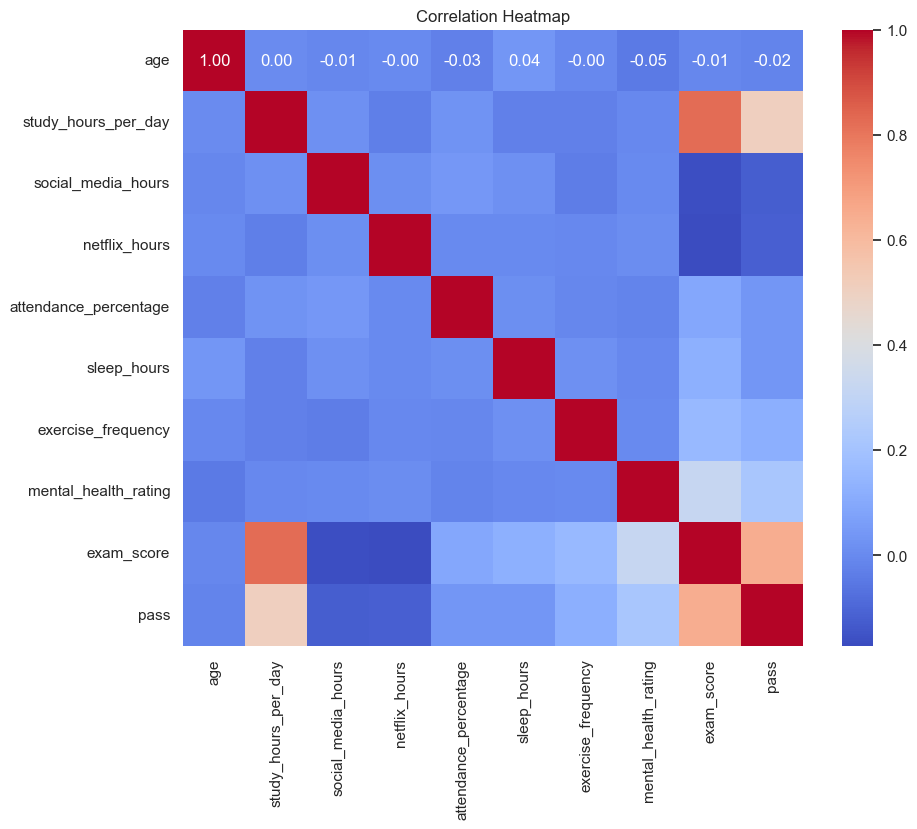

In [51]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


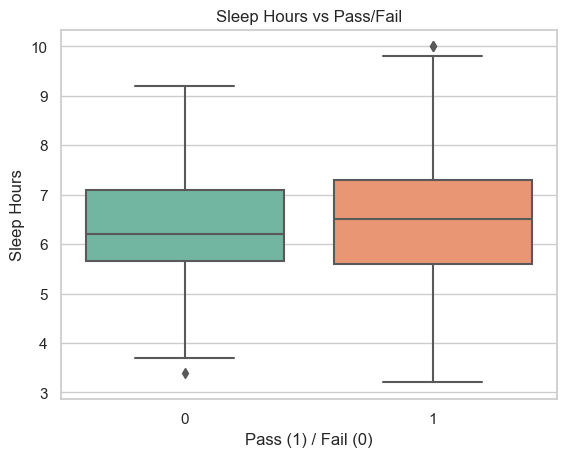

In [52]:
sns.boxplot(x='pass', y='sleep_hours', data=data, palette='Set2')
plt.title("Sleep Hours vs Pass/Fail")
plt.xlabel("Pass (1) / Fail (0)")
plt.ylabel("Sleep Hours")
plt.show()
